In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [28]:
df = pd.read_csv("Boston_Housing.csv")
dataset=pd.DataFrame(df)
dataset = df.drop(columns=['Unnamed: 14'])
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [29]:
#independent features and dependent features
X=dataset.iloc[:,0:13]
Y=dataset.iloc[:,-1]

In [30]:
##train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state=42)


In [31]:
##standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
X_train= scaler.fit_transform(X_train)

In [33]:
X_test = scaler.transform(X_test)

In [34]:
#to remove over fitting problem we use ridge regression

In [35]:
ridge_regression = Ridge()

In [36]:
parameters={'alpha':[1,2,3,4,5,10,20,30,40,50,60,70,80,90,100]}
ridgecv = GridSearchCV(ridge_regression, parameters, scoring='neg_mean_squared_error', cv=5)
ridgecv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70,
                                   80, 90, 100]},
             scoring='neg_mean_squared_error')

In [37]:
print(ridgecv.best_params_)

{'alpha': 10}


In [38]:
print(ridgecv.best_score_)#mean square error

-25.80722882229147


In [39]:
ridge_pred = ridgecv.predict(X_test)

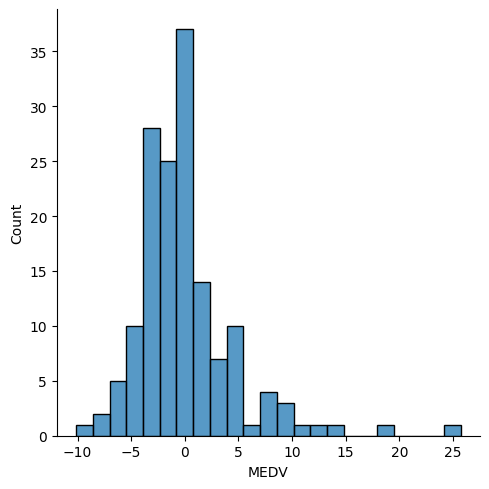

In [40]:
sns.displot(Y_test-ridge_pred)

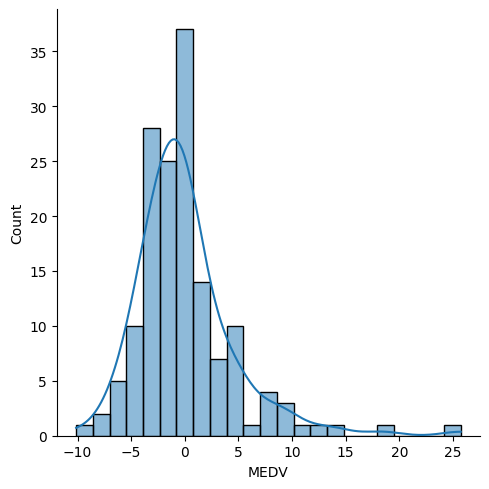

In [41]:
sns.displot(Y_test-ridge_pred, kde=True)

In [42]:
from sklearn.metrics import r2_score

In [43]:
score=r2_score(Y_test,ridge_pred)

In [44]:
score

0.7072830902371282